In [ ]:
import pandas as pd
import numpy as np
import plotnine as p9
import matplotlib.pyplot as plt


date_time = "2023-07-24_14:48"
date_time = "2023-07-24_17:04"
date_time = "2023-07-24_17:52"

date_time = "2023-07-24_19:57"
date_time = "2023-07-24_20:34"

date_time = "2023-07-24_21:00"
date_time = "2023-07-25_20:37"

date_time = "2023-07-30_19:34"


root_results_dir = "/projects/genomic-ml/da2343/ml_project_2/hpc/accuracy_tune/results"
df = pd.read_csv(f"{root_results_dir}/{date_time}_results.csv")

In [2]:
# remove the rows with NaNs
df = df[~df.isna().any(axis=1)]
df

,accuracy,no_of_trades,no_of_wins,no_of_losses,slope_threshold,year,step_length,mean_mape,dataset_name,algorithm,train_size,fh,window_size,sma
0,0.250000,12,3,9,0,2022,360,0.005016,EURUSD_H1,LinearRegression,33600,360,480,200
1,0.461538,13,6,7,0,2020,360,0.004669,EURUSD_H1,LinearRegression,33600,360,480,200
2,0.583333,12,7,5,0,2017,360,0.005261,EURUSD_H1,LinearRegression,33600,360,480,200
3,0.250000,12,3,9,0,2016,360,0.006438,EURUSD_H1,LinearRegression,33600,360,480,200
4,0.200000,10,2,8,0,2019,360,0.002861,EURUSD_H1,LinearRegression,33600,360,480,200
5,0.555556,9,5,4,0,2021,360,0.003562,EURUSD_H1,LinearRegression,33600,360,480,200
6,0.142857,14,2,12,0,2018,360,0.005309,EURUSD_H1,LinearRegression,33600,360,480,200


In [ ]:
df

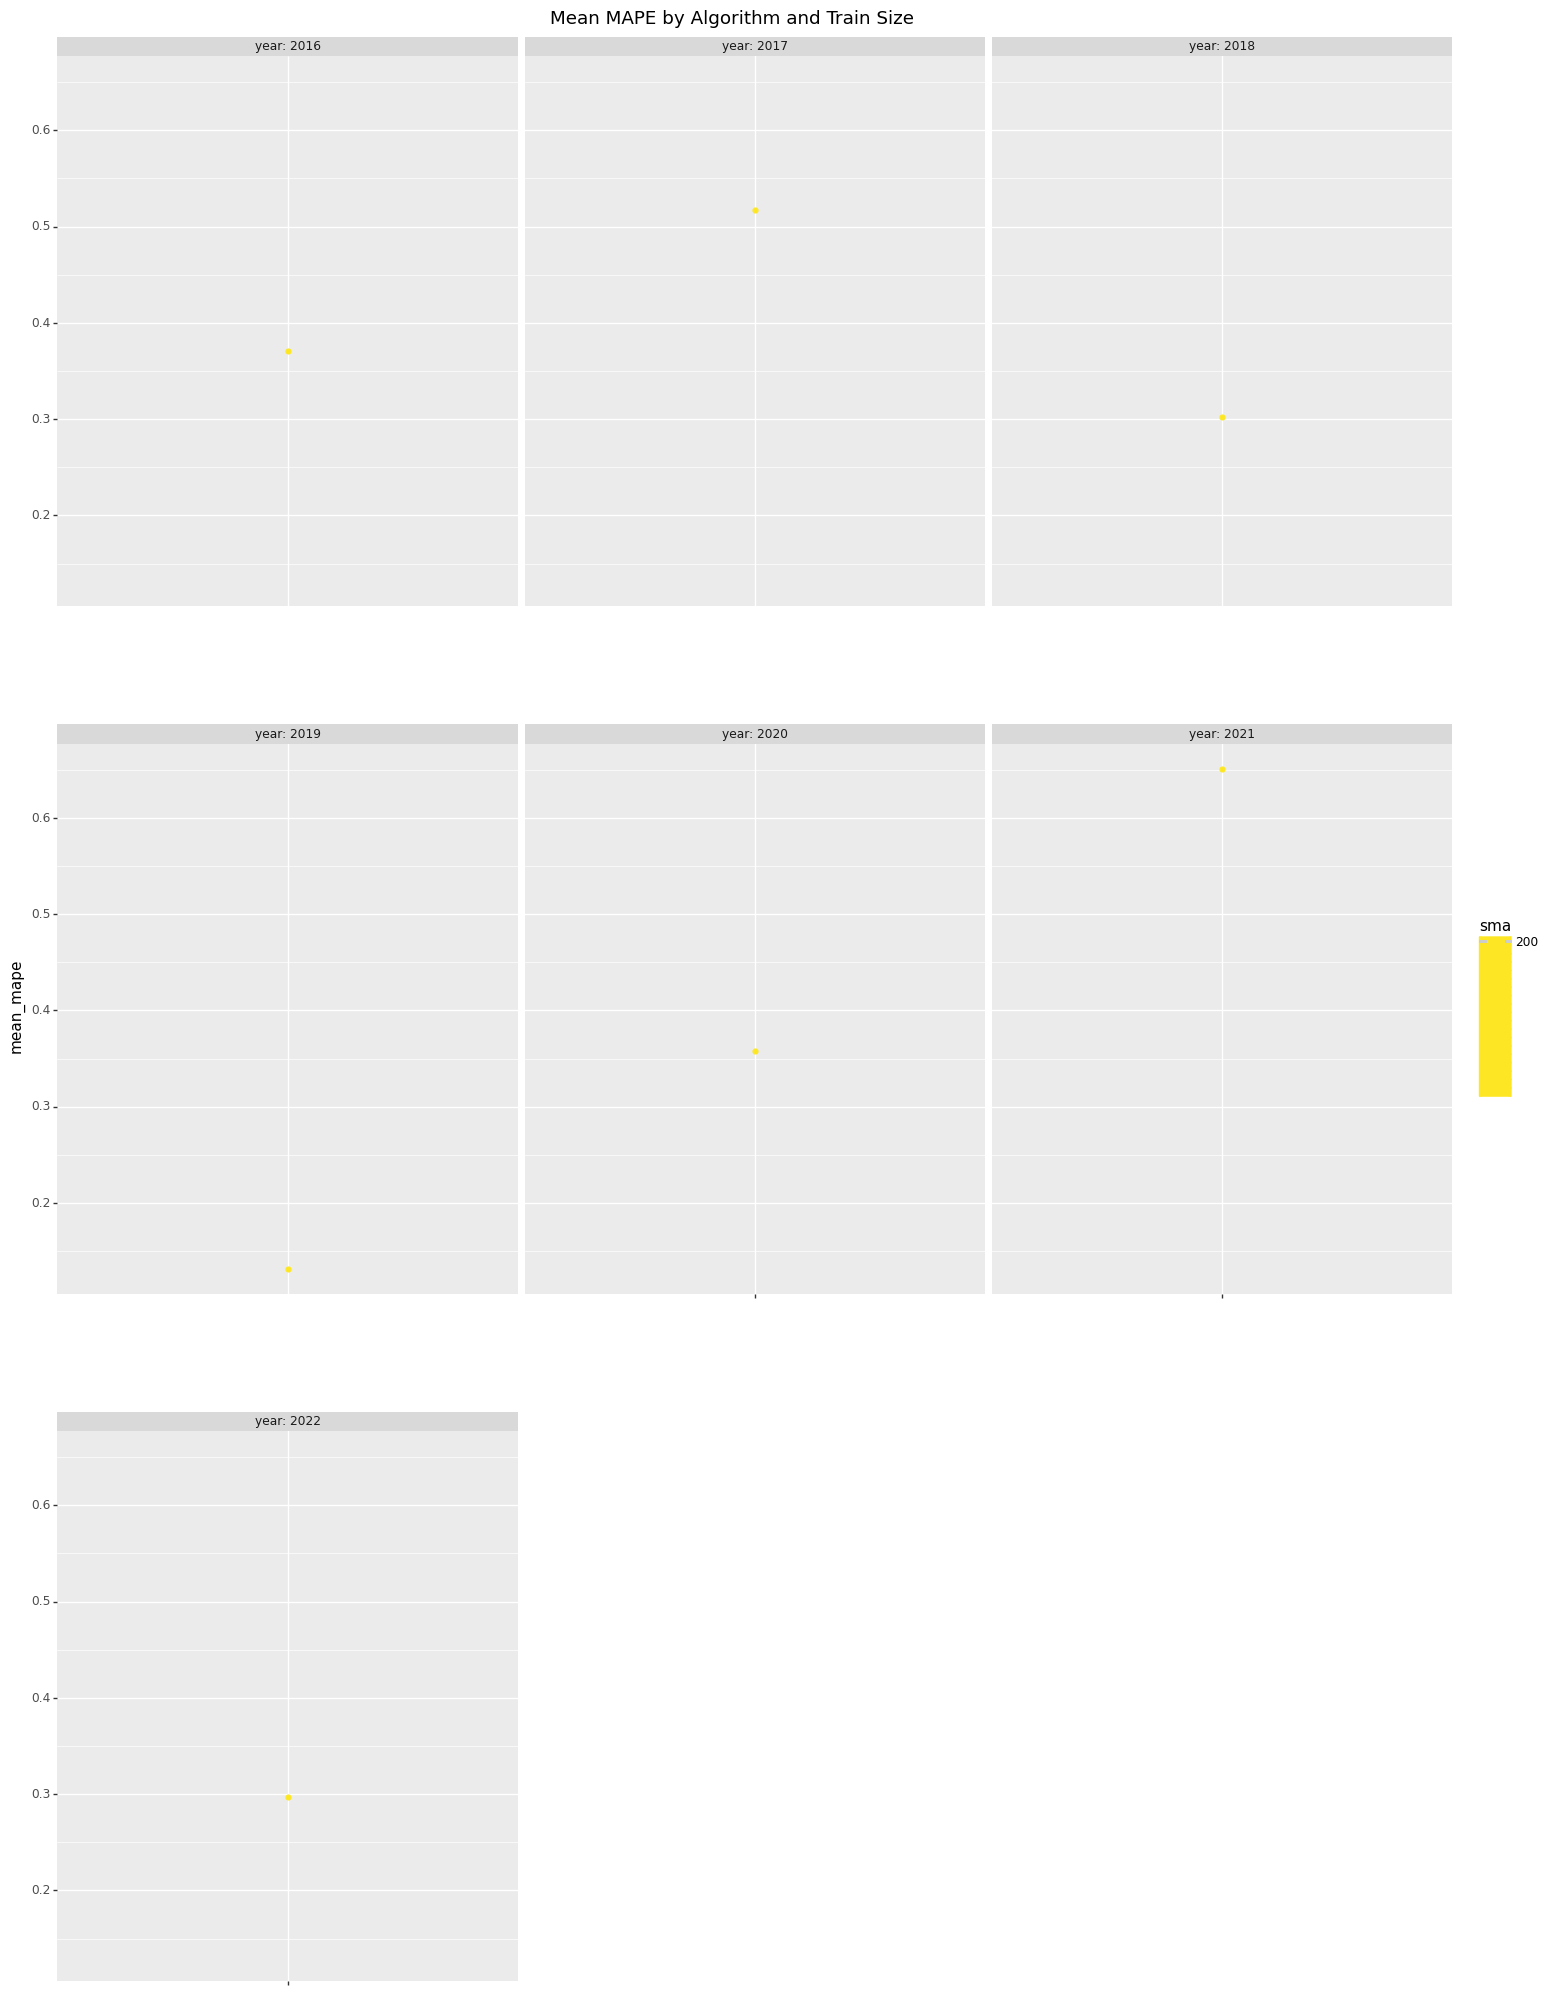

<ggplot: (1409128261907)>

In [25]:
# Import pandas and plotnine
import pandas as pd
from plotnine import *

my_df = df.copy() 
# my_df = df[(df["window_size"] >= 200) & (df["fh"] == 120)]
# my_df = df[(df["no_of_trades"] >= 60) & (df["accuracy"] > 0.5)]
# my_df = df[(df["sma"] == 200) & (df["fh"] == 360) & (df["train_size"] == 33600) & (df['slope_threshold'] == 0) & (df['window_size'] == 480) ]

p = (ggplot(my_df, aes(x="algorithm", y="accuracy", color="sma")) +
     geom_point(aes(group="dataset_name")) +
     # facet_wrap("~train_size + fh + window_size + year + slope_threshold + sma",  labeller=label_both) +
     facet_wrap("~year",  labeller=label_both) +
     labs(x="algorithm", y="mean_mape") +
     theme(axis_text_x=element_blank(), axis_title_x=element_blank(), subplots_adjust={'hspace': 0.25}, figure_size=(18, 25)) +
     ggtitle("Mean MAPE by Algorithm and Train Size"))
# save plot
# p.save(f"{root_results_dir}/{date_time}_results.png", dpi=300)
p
